<a href="https://colab.research.google.com/github/sowjanyad1412/GRIP_TASK1/blob/main/Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction using Decision Tree Algorithm
Decision Tree by Sowjanya D


In [1]:

import pandas as pd # data analysis and manipulation tool
import numpy as np # large collection of high-level mathematical functions
import seaborn as sns # used for statistical data visualization

In [2]:

import matplotlib.pyplot as plt # used for programmatic plot generation

Loading iris data set

In [5]:

iris = pd.read_csv("/content/Iris.csv") 
iris.set_index("Id", inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


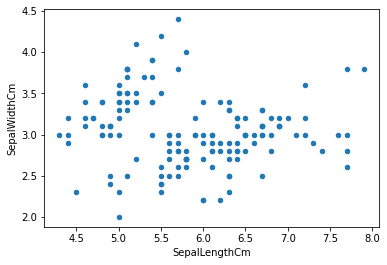

In [8]:
iris.plot(kind="scatter", x="SepalLengthCm",   y="SepalWidthCm") 
plt.show()

In [9]:
iris.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

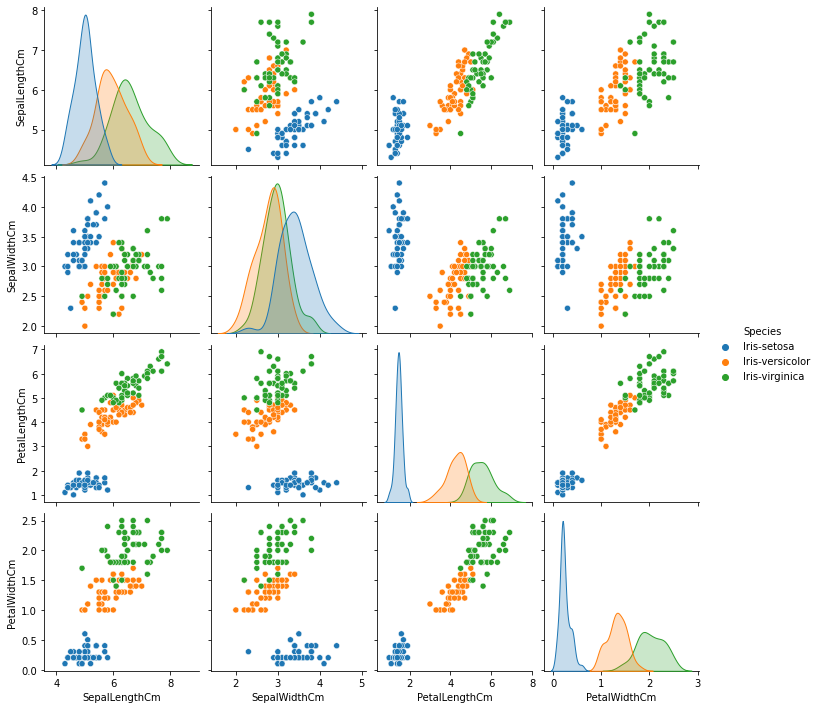

In [10]:
sns.pairplot(iris, hue='Species')

plt.show()

To split the dataset

In [11]:

X = iris.drop("Species", axis=1).values
y = iris["Species"]

In [12]:
y_num = y = iris["Species"].replace({"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3 })


In [13]:
from sklearn.model_selection import train_test_split # loading the train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y_num, test_size=0.33, random_state=42) # splits into train and test

Model Evaluation

In [14]:
from sklearn.tree import DecisionTreeClassifier # Loading the classifier
from sklearn.metrics import accuracy_score

In [15]:
tree_clf = DecisionTreeClassifier(random_state=42) # initializing classifier
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

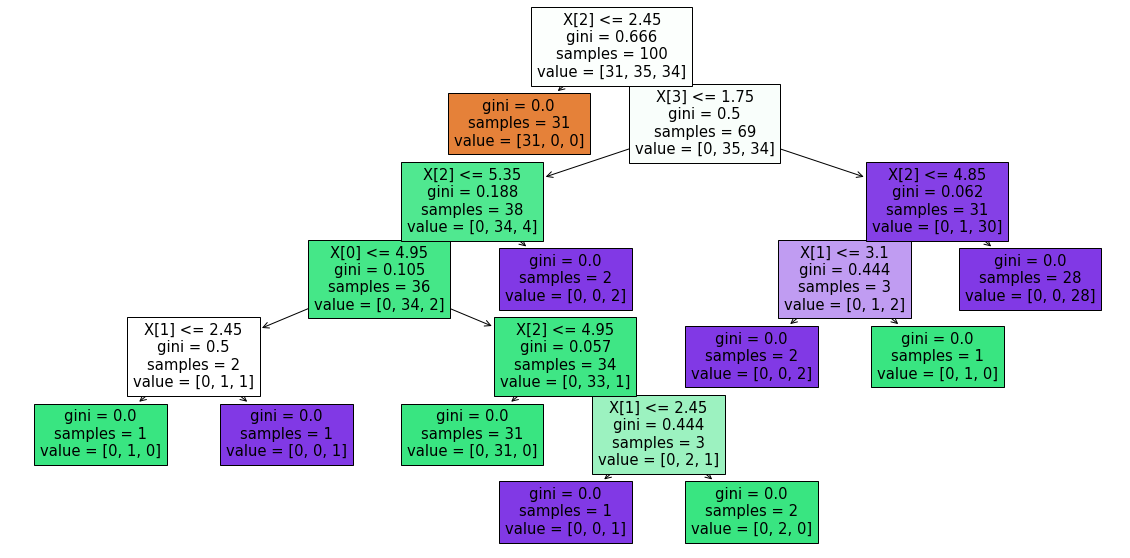

In [16]:
from sklearn.tree import plot_tree # loading the plot tree function

plt.figure(figsize = (20,10)) # setting the figure size

plot_tree(tree_clf, filled=True) # plotting the initial tree

plt.show()

In [17]:
from sklearn import metrics

y_pred = tree_clf.predict(X_test) # predicting the test data

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [18]:

pd.crosstab(y_test, y_pred)

col_0,1,2,3
Species,,,
1,19,0,0
2,0,15,0
3,0,1,15


In [19]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train) # getting the effective alphas
ccp_alphas, impurities = path.ccp_alphas, path.impurities

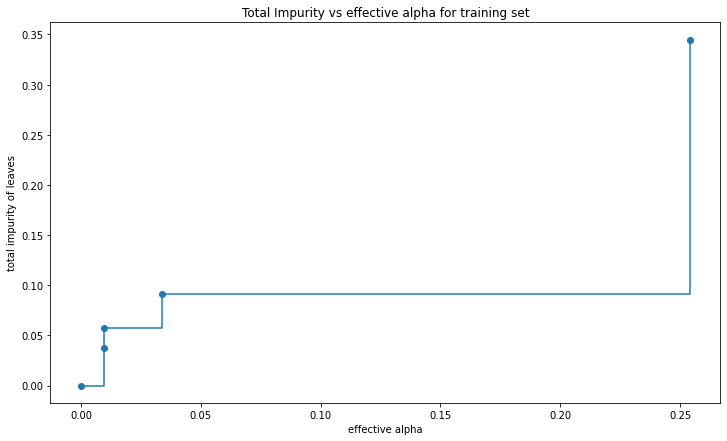

In [20]:
fig, ax = plt.subplots(figsize=(12,7)) # setting the size and axes

ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post") # plotting alpha vs impurities
ax.set_xlabel("effective alpha") # set the x-label
ax.set_ylabel("total impurity of leaves") # set the y-label
ax.set_title("Total Impurity vs effective alpha for training set") # set the title

plt.show() 

In [21]:
clfs = [] # initializing 
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha) # tree for each alpha
    clf.fit(X_train, y_train) # training for each alpha
    clfs.append(clf) # appending the classifier to the list
print(f"Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}")

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32087246376811596


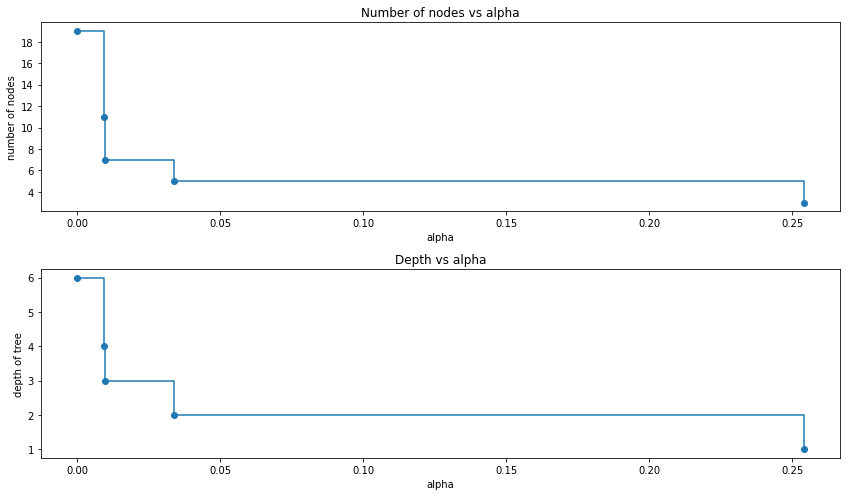

In [22]:
clfs = clfs[:-1] 
ccp_alphas = ccp_alphas[:-1] 

node_counts = [clf.tree_.node_count for clf in clfs] # node counts for each classifier
depth = [clf.tree_.max_depth for clf in clfs] # depth values for each classifier
fig, ax = plt.subplots(2, 1, figsize=(12,7)) # set the axes and create the subplots
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post") # plot aplha vs nodes
ax[0].set_xlabel("alpha") # set x-label for plot-1
ax[0].set_ylabel("number of nodes") # set y-label for plot-1
ax[0].set_title("Number of nodes vs alpha") # set title for plot-1
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post") # plot aplha vs depth
ax[1].set_xlabel("alpha") # set x-label for plot-2
ax[1].set_ylabel("depth of tree") # set y-label for plot-2
ax[1].set_title("Depth vs alpha") # set title for plot-22
fig.tight_layout()

Accuracy vs Alpha

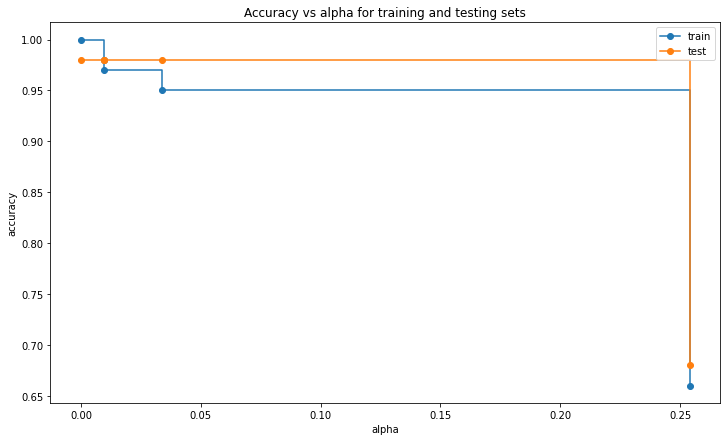

In [23]:
train_scores = [clf.score(X_train, y_train) for clf in clfs] # train scores for all classifiers
test_scores = [clf.score(X_test, y_test) for clf in clfs] # test scores for all classifiers

fig, ax = plt.subplots(figsize=(12,7)) # set the axes and size
ax.set_xlabel("alpha") # set the x-label
ax.set_ylabel("accuracy") # set the y-label
ax.set_title("Accuracy vs alpha for training and testing sets") # set the title
ax.plot(ccp_alphas, train_scores, marker='o', label="train", 
        drawstyle="steps-post") # plot aplha vs train scores 
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post") # plot alpha vs test scores
ax.legend() # adding legend
plt.show()